In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
calendrier_challenge = pd.read_parquet("challenge_data/calendrier_challenge.parquet")
questionnaire = pd.read_parquet("challenge_data/questionnaire.parquet")
consos_challenge = pd.read_parquet("challenge_data/consos_challenge.parquet")
temperatures = pd.read_parquet("challenge_data/temperatures.parquet")

In [4]:
min_date = datetime.datetime(2009,7,15)
max_date=datetime.datetime(2011,1,1)
all_clients = list(set(consos_challenge["id_client"]))
day = datetime.datetime(2011,1,2)-datetime.datetime(2011,1,1)
print(len(all_clients))

615


In [125]:
def load_signal(id_client,min_time,max_time):

    return consos_challenge[consos_challenge["id_client"]==id_client][consos_challenge["horodate"]>min_time][consos_challenge["horodate"]<max_time]["puissance_W"]

In [151]:
#Données sur une semaine
start_date = datetime.datetime(2010,1,1,18)
prediction_date = datetime.datetime(2010,1,8,18)
end_date = datetime.datetime(2010,1,8,21)
delta = 7*day
X =[]
y=[]
k=0
for i in range(360):
    print(i)
    predict_date = consos_challenge[consos_challenge["horodate"]>=prediction_date+i*day][consos_challenge["horodate"]<end_date+i*day]
    data_date =  consos_challenge[consos_challenge["horodate"]>=start_date+i*day][consos_challenge["horodate"]<prediction_date+i*day]
    for client in all_clients:
        X.append(np.array(data_date[consos_challenge["id_client"]==client]["puissance_W"]))
        y.append(np.array(predict_date[consos_challenge["id_client"]==client]["puissance_W"]))

X=np.array(X)
y=np.array(y)
np.save('Xreg.npy',X)
np.save('yreg.npy',y)
n=len(X)

X_train,X_validation, X_test = X[:int(n*0.7)],X[int(n*0.7):int(n*0.8)],X[int(n*0.8):]
y_train,y_validation, y_test = y[:int(n*0.7)],y[int(n*0.7):int(n*0.8)],y[int(n*0.8):]

0


C:\Users\paulc\AppData\Local\Temp/ipykernel_20080/218562059.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  predict_date = consos_challenge[consos_challenge["horodate"]>=prediction_date+i*day][consos_challenge["horodate"]<end_date+i*day]
C:\Users\paulc\AppData\Local\Temp/ipykernel_20080/218562059.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_date =  consos_challenge[consos_challenge["horodate"]>=start_date+i*day][consos_challenge["horodate"]<prediction_date+i*day]
C:\Users\paulc\AppData\Local\Temp/ipykernel_20080/218562059.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X.append(np.array(data_date[consos_challenge["id_client"]==client]["puissance_W"]))
C:\Users\paulc\AppData\Local\Temp/ipykernel_20080/218562059.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y.append(np.array(predict_date[consos_challenge["id_client"]==client]["puiss

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (221400,) + inhomogeneous part.

In [29]:

Xarray = np.array(X[:-615])
yarray = np.array(y[:-615])
np.save('Xreg.npy',Xarray)
np.save('yreg.npy',yarray)
print(n)

NameError: name 'X' is not defined

In [32]:
from sklearn.model_selection import train_test_split
Xarray = np.load('Xreg.npy')
yarray = np.load('yreg.npy')
print(len(Xarray))
X_train, X_test, y_train, y_test = train_test_split(Xarray, yarray, test_size=0.2, random_state=42)

220785


In [34]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
y_train_E = y_train.mean(axis=1)
y_test_E = y_test.mean(axis=1)
model=Lasso(alpha=0.05).fit(X_train,y_train)


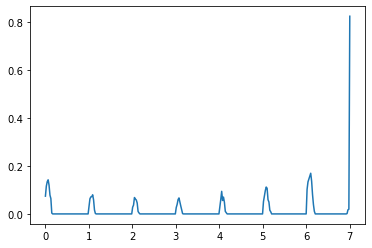

1.8708510658850548 3.1973528339723165
0.48168787055178064 1.0060282882826788
6.108727814060961 6.4879999999999995


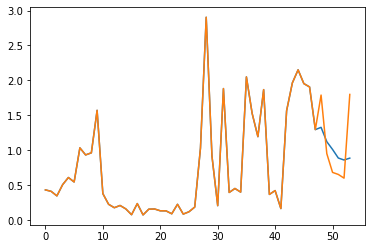

3.8783036680198792 4.059


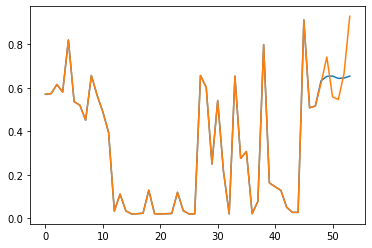

7.476670255260219 4.997000000000001


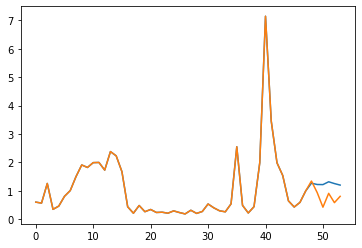

3.284628359297117 1.6629999999999998


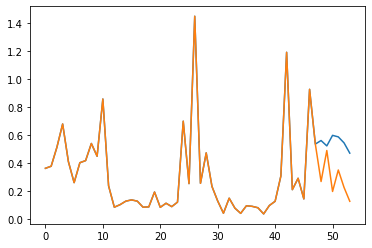

4.500594270130298 5.226999999999999


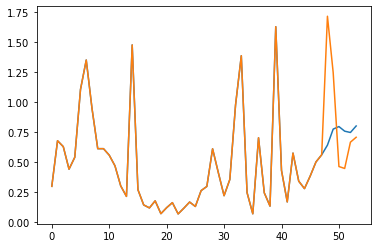

3.10984388639091 1.111


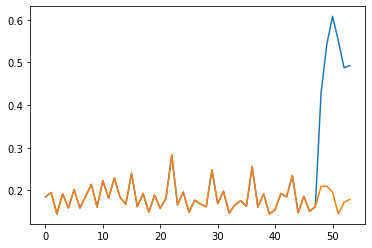

5.566872375238286 5.396


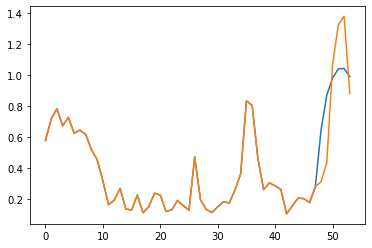

4.920077553668125 8.28


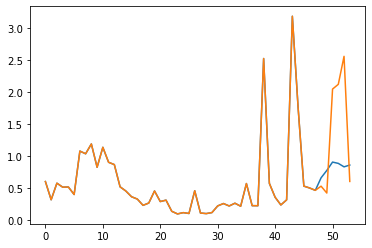

4.744594660297605 4.915


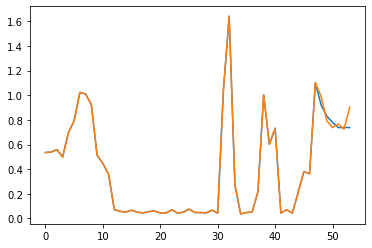

4.564971367499469 6.074


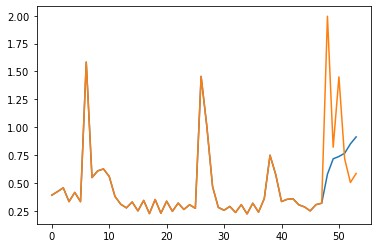

In [131]:
plt.plot(np.linspace(0,7,48*7),model.coef_.sum(axis=0))
plt.show()
y_predict= model.predict(X_test)
y_mean = y_train_E.mean()

np.save('lasso_coefs.npy',model.coef_.sum(axis=0))
#print("MSE mean estimator :", np.mean((y_test_E-y_mean)**2))
#print("MSE Lasso :", np.mean((y_test_E-y_predict_E)**2))
print(np.mean(np.abs(y_test.sum(axis=1)-y_predict.sum(axis=1))),np.mean(np.abs(y_test.sum(axis=1)-6*X_test[:,-1])))
print(np.mean((y_test-y_predict)**2),np.mean((y_test.T-X_test[:,-1].T)**2))
k=9
for i in range(10):
    print(y_predict[k*i+2].sum(),y_test[k*i+2].sum())
    plt.plot(list(X_test[k*i+2,-48:])+list(y_predict[k*i+2]))
    plt.plot(list(X_test[k*i+2,-48:])+list(y_test[k*i+2]))
    plt.show()

Processus gaussien

In [123]:
start_date = datetime.datetime(2009,8,15,18)
prediction_date = datetime.datetime(2009,8,15,18)+7*day
end_date = datetime.datetime(2009,8,15,21)+7*day
newX =[]
newy=[]
k=0
for i in range(0,500,7):
    print(i)
    predict_date = consos_challenge[consos_challenge["horodate"]>=prediction_date+i*day]
    predict_date = predict_date[predict_date["horodate"]<end_date+i*day]
    data_date =  consos_challenge[consos_challenge["horodate"]>=start_date+i*day]
    data_date = data_date[data_date["horodate"]<prediction_date+i*day]
    for client in all_clients[0:20]:
        newX.append(np.array(data_date[data_date["id_client"]==client].puissance_W))
        newy.append(np.array(predict_date[predict_date["id_client"]==client].puissance_W))

n=len(newX)
newX=np.array(newX)
newy=np.array(newy)
X_train2, X_test2, y_train2, y_test2 = train_test_split(newX, newy, test_size=0.2,random_state=42)

0
7
14
21
28
35
42
49
56
63
70
77
84
91
98
105
112
119
126
133
140
147
154
161
168
175
182
189
196
203
210
217
224
231
238
245
252
259
266
273
280
287
294
301
308
315
322
329
336
343
350
357
364
371
378
385
392
399
406
413
420
427
434
441
448
455
462
469
476
483
490
497


(1152, 336) (1152, 6)


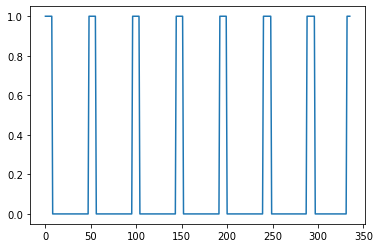

In [126]:
plt.plot(model.coef_.sum(axis=0)>0)
filter = model.coef_.sum(axis=0)
print(X_train2.shape,y_train2.shape)

c:\Users\paulc\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


2.0336162114610437 3.1445540498456563
0.46108297198174963 0.9749203690001903
4.3629999999999995 2.4848180026206075


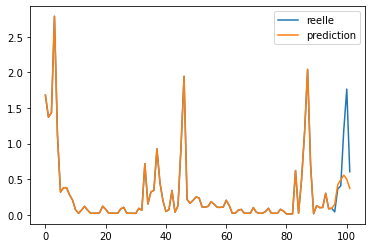

1.075 4.992172534668826


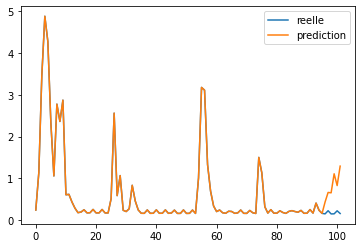

2.61 2.3698806719344176


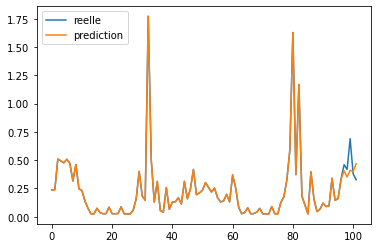

1.835 3.5095426028565044


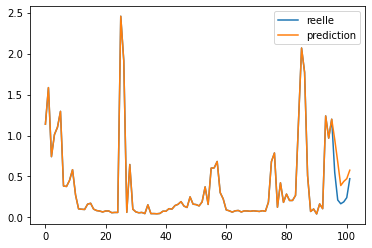

8.906 10.84223648767068


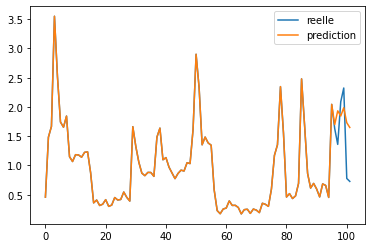

3.8409999999999997 6.669777246530874


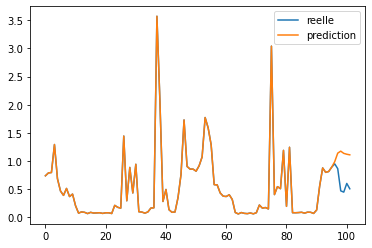

1.029 3.367954204813972


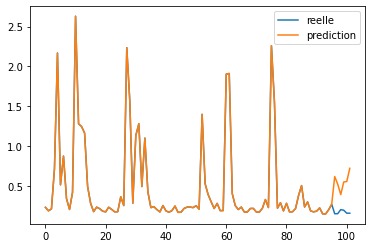

13.004999999999999 9.294441669962321


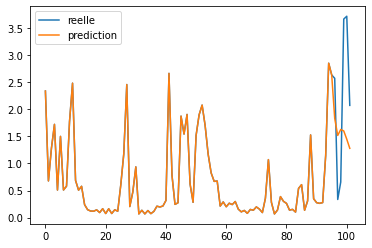

11.678 7.337170299460491


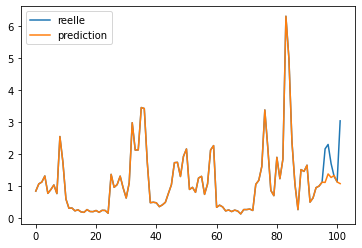

4.381 6.736010985599036


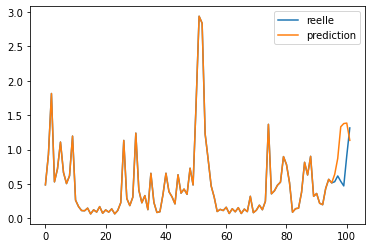

In [130]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, ConstantKernel, RBF

kernel=  ConstantKernel(1.0) * RBF(1) + ConstantKernel(1.0)*DotProduct(1.0)
model2 = GaussianProcessRegressor(kernel=kernel)
model2.fit((X_train2-X_train2.mean(axis=0))*filter,y_train2-y_train2.mean(axis=0))
y_predict2 = model2.predict((X_test2-X_train2.mean(axis=0))*filter)+y_train2.mean(axis=0)
print(np.mean(np.abs(y_test2.sum(axis=1)-y_predict2.sum(axis=1))),np.mean(np.abs(y_test2.sum(axis=1)-6*X_test2[:,-1])))
print(np.mean((y_test2-y_predict2)**2),np.mean((y_test2.T-X_test2[:,-1].T)**2))
for i in range(10,20):
    print(y_test2[i].sum(),y_predict2[i].sum())
    plt.plot(list(X_test2[i,-48*2:])+list(y_test2[i]),label='reelle')
    plt.plot(list(X_test2[i,-48*2:])+list(y_predict2[i]),label='prediction')
    plt.legend()
    plt.show()